In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns

# EDA

In [2]:
bike = pd.read_csv('최종데이터.csv', encoding='cp949')
bike

,Dong_name,code_dong,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,...,W_child,W_teenager,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum
0,가락1동,11710631,42.58,42.35,7,2.0,2988.0,5.0,287.0,0.0,...,21462.96,26269.89,37340.87,63199.29,53669.20,56419.00,46770.79,33483.47,321525.67,338615.47
1,가락2동,11710632,47.42,46.97,5,6.0,1901.0,44.0,144.0,1.0,...,27266.29,37623.89,43008.96,53467.95,61379.82,59961.07,47852.46,40968.07,314295.99,371528.51
2,가락본동,11710620,29.90,31.00,6,2.0,3489.0,44.0,1986.0,0.0,...,28307.03,33042.97,67452.62,81496.19,76617.26,78745.07,55112.75,39906.06,449157.07,460679.95
3,가리봉동,11530595,27.84,28.74,1,0.0,993.0,8.0,326.0,0.0,...,1628.15,3141.69,24724.62,23998.43,17637.52,21234.31,14367.82,15249.66,152135.15,121982.20
4,가산동,11545510,43.42,43.35,19,7.0,16661.0,57.0,2419.0,0.0,...,11959.29,16029.77,163080.66,141960.79,92089.70,75059.80,42315.15,28966.70,814951.84,571461.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,효창동,11170580,19.81,21.13,2,0.0,418.0,14.0,110.0,1.0,...,10420.71,10713.03,20631.12,24206.48,19457.64,19675.08,14148.53,19063.61,106881.68,138316.20
412,후암동,11170510,13.26,14.65,2,0.0,928.0,15.0,301.0,0.0,...,8083.37,11368.53,25913.49,32108.32,29707.73,24658.22,20501.38,24725.54,162641.75,177066.58
413,휘경1동,11230720,41.19,41.10,4,0.0,929.0,39.0,455.0,0.0,...,9111.12,16476.38,60679.10,27767.30,22969.57,25412.94,20482.21,25691.09,174686.46,208589.71
414,휘경2동,11230730,54.03,53.26,7,0.0,1221.0,28.0,59.0,0.0,...,14059.11,23551.61,52511.26,28566.01,31472.69,33902.75,28311.26,32882.45,218512.85,245257.14


In [3]:
# feature 확인
df = bike.iloc[:,2:]
df

,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,cafe,house,...,W_child,W_teenager,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum
0,42.58,42.35,7,2.0,2988.0,5.0,287.0,0.0,13.0,9716.0,...,21462.96,26269.89,37340.87,63199.29,53669.20,56419.00,46770.79,33483.47,321525.67,338615.47
1,47.42,46.97,5,6.0,1901.0,44.0,144.0,1.0,43.0,10424.0,...,27266.29,37623.89,43008.96,53467.95,61379.82,59961.07,47852.46,40968.07,314295.99,371528.51
2,29.90,31.00,6,2.0,3489.0,44.0,1986.0,0.0,68.0,8410.0,...,28307.03,33042.97,67452.62,81496.19,76617.26,78745.07,55112.75,39906.06,449157.07,460679.95
3,27.84,28.74,1,0.0,993.0,8.0,326.0,0.0,10.0,2551.0,...,1628.15,3141.69,24724.62,23998.43,17637.52,21234.31,14367.82,15249.66,152135.15,121982.20
4,43.42,43.35,19,7.0,16661.0,57.0,2419.0,0.0,183.0,6200.0,...,11959.29,16029.77,163080.66,141960.79,92089.70,75059.80,42315.15,28966.70,814951.84,571461.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,19.81,21.13,2,0.0,418.0,14.0,110.0,1.0,15.0,3463.0,...,10420.71,10713.03,20631.12,24206.48,19457.64,19675.08,14148.53,19063.61,106881.68,138316.20
412,13.26,14.65,2,0.0,928.0,15.0,301.0,0.0,25.0,5363.0,...,8083.37,11368.53,25913.49,32108.32,29707.73,24658.22,20501.38,24725.54,162641.75,177066.58
413,41.19,41.10,4,0.0,929.0,39.0,455.0,0.0,16.0,4327.0,...,9111.12,16476.38,60679.10,27767.30,22969.57,25412.94,20482.21,25691.09,174686.46,208589.71
414,54.03,53.26,7,0.0,1221.0,28.0,59.0,0.0,24.0,6802.0,...,14059.11,23551.61,52511.26,28566.01,31472.69,33902.75,28311.26,32882.45,218512.85,245257.14


In [4]:
df.columns

Index(['return_day', 'rent_day', 'rental_stop', 'large_store', 'company',
       'hospital', 'restaurant', 'park', 'cafe', 'house', 'bank', 'car',
       'school', 'bus_stop', 'bus_geton_people', 'bus_getoff_people',
       'subway_station', 'subway_geton_people', 'subway_getoff_people',
       'M_child', 'M_teenager', 'M_20', 'M_30', 'M_40', 'M_50', 'M_60',
       'M_over70', 'W_child', 'W_teenager', 'W_20', 'W_30', 'W_40', 'W_50',
       'W_60', 'W_over70', 'M_sum', 'W_sum'],
      dtype='object')

<span style ='color:blue'>따릉이 대여소와 대여/반납</span><br>
(3개 feature : return_day, rent_day, rental_stop)<br>
<span style ='color:blue'>토지특성인 시설물 수</span><br>(12개 feature : large_store(대규모점포), company, hospital, restaurant, park, cafe, house, bank, car, school, bus_stop, subway_station)<br>
<span style ='color:blue'>대중교통(버스, 지하철)이용에 따른 승객 승하차 수</span><Br>(4개 feature : bus_geton_people, bus_getoff_people, subway_geton_people, subway_getoff_people)<br>
<span style ='color:blue'>지역특성인 하루 평균 연령대별/성별 생활인구</span><br>(18개 feature : M_child, M_teenager, M_20, M_30, M_40, M_50, M_60, M_over70, W_child, W_teenager, W_20, W_30, W_40, W_50, W_60, W_over70, M_sum, W_sum)<br>
<span style ='color:red'>총 37개</span>의 feature가 있음을 확인할 수 있습니다.

In [5]:
print("instance 수:",len(df))

instance 수: 416


- instance가 416개로 416개의 행정동이 있음을 알 수 있습니다.<br>
- 서울에 행정동은 426개가 존재하는데, 10개의 동이 없는 이유는 따릉이 대여소가 실제로 존재하지 않거나, 수집한 따릉이 대여소 위치정보에서 누락된 대여소가 존재하여 데이터를 합치는 과정에서 사라진 것 입니다.

In [6]:
# 각 feature의 통계량 확인 
df.iloc[:,:10].describe()

,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,cafe,house
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.00000,416.000000,416.000000,416.000000,416.000000
mean,44.802500,44.744808,5.855769,3.276442,1931.194712,44.65625,541.550481,0.300481,40.718750,7064.798077
std,26.165673,24.592908,4.823473,6.623290,1935.560698,56.59588,559.769498,0.549786,42.131409,3146.522643
min,3.450000,4.650000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,26.225000,27.232500,3.000000,0.000000,958.000000,19.00000,228.750000,0.000000,17.000000,4989.000000
50%,41.290000,41.325000,5.000000,1.000000,1417.000000,30.50000,376.000000,0.000000,31.000000,6845.500000
75%,57.255000,57.007500,7.000000,4.000000,2125.500000,51.25000,639.250000,1.000000,50.000000,8972.250000
max,188.680000,187.260000,41.000000,87.000000,16661.000000,583.00000,5343.000000,3.000000,422.000000,18754.000000


In [7]:
df.iloc[:,10:19].describe()

,bank,car,school,bus_stop,bus_geton_people,bus_getoff_people,subway_station,subway_geton_people,subway_getoff_people
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,4.451923,51120.338942,3.110577,25.632212,372.812999,364.889675,0.884615,5106.653898,5090.079856
std,7.069200,25817.589334,2.319594,14.556142,220.371996,215.474755,1.170379,7113.744970,7148.820049
min,0.000000,0.000000,0.000000,1.000000,44.710000,20.060000,0.000000,0.000000,0.000000
25%,1.000000,34643.750000,1.000000,15.000000,219.298866,208.586999,0.000000,0.000000,0.000000
50%,3.000000,47036.500000,3.000000,23.000000,299.135707,298.352273,1.000000,1037.886667,879.900000
75%,5.000000,62712.500000,4.000000,32.000000,476.161429,465.470536,1.000000,8086.249167,7981.460000
max,67.000000,174084.000000,15.000000,100.000000,1261.240667,1486.972000,6.000000,50494.350000,49060.810000


In [8]:
df.iloc[:,19:29].describe()

,M_child,M_teenager,M_20,M_30,M_40,M_50,M_60,M_over70,W_child,W_teenager
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,19556.634447,25132.944303,39846.762957,47819.483389,48811.267139,40328.628510,27279.467740,23335.792716,18480.429375,24210.153317
std,13077.962817,17631.041859,27440.109947,34529.789983,32017.664959,21379.386007,12607.019941,10780.907728,12323.747410,16204.473415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11312.962500,14282.270000,22416.297500,27238.572500,29619.115000,26704.102500,19092.492500,16423.842500,10711.347500,14064.305000
50%,17214.940000,21526.390000,34132.505000,39930.800000,40790.720000,35841.460000,25631.660000,22089.920000,15796.610000,20815.800000
75%,24944.662500,30779.672500,49844.620000,59094.167500,59538.930000,50788.102500,34745.790000,29181.985000,23187.845000,29767.222500
max,92481.610000,137880.000000,237591.870000,343711.260000,276607.060000,169480.360000,80929.990000,63323.800000,84945.140000,99986.080000


In [9]:
df.iloc[:,29:37].describe()

,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,4.160000e+02
mean,47459.509808,49423.469135,47000.717452,42930.375601,34005.118341,36705.956659,2.721110e+05,3.002157e+05
std,35584.821505,31266.359332,25638.968892,19525.921005,15293.693510,16855.610575,1.455610e+05,1.488412e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,25163.832500,29547.850000,29772.452500,30052.745000,23649.357500,26160.097500,1.810894e+05,2.040179e+05
50%,38778.710000,42384.010000,41022.440000,39891.180000,32578.445000,34886.390000,2.449779e+05,2.759402e+05
75%,61069.317500,61917.325000,60446.837500,54834.417500,42715.657500,46461.525000,3.428228e+05,3.865456e+05
max,324678.230000,304398.160000,174132.720000,112638.900000,94814.530000,103170.300000,1.225166e+06,1.124977e+06


- 시설물 feature가 min이 0인 것을 보아 특정 행정동에는 시설물 수가 없을 수도 있음을 확인할 수 있습니다.<br>
- 생활인구 feature 와 다른 시설물 feature간에 수치가 차이가 너무 크기에 분석을 진행할 때는 scaling이 필요함을 알 수 있습니다.<br>
- 지하철과 버스 승/하차 승객 수를 비교해보면 지하철을 이용하는 사람들이 훨씬 많음을 알 수 있습니다.<br>

In [10]:
# 결측치 여부 확인
df.isnull().sum()

return_day              0
rent_day                0
rental_stop             0
large_store             0
company                 0
hospital                0
restaurant              0
park                    0
cafe                    0
house                   0
bank                    0
car                     0
school                  0
bus_stop                0
bus_geton_people        0
bus_getoff_people       0
subway_station          0
subway_geton_people     0
subway_getoff_people    0
M_child                 0
M_teenager              0
M_20                    0
M_30                    0
M_40                    0
M_50                    0
M_60                    0
M_over70                0
W_child                 0
W_teenager              0
W_20                    0
W_30                    0
W_40                    0
W_50                    0
W_60                    0
W_over70                0
M_sum                   0
W_sum                   0
dtype: int64

In [11]:
# feature type 확인 
df.dtypes

return_day              float64
rent_day                float64
rental_stop               int64
large_store             float64
company                 float64
hospital                float64
restaurant              float64
park                    float64
cafe                    float64
house                   float64
bank                    float64
car                     float64
school                  float64
bus_stop                  int64
bus_geton_people        float64
bus_getoff_people       float64
subway_station          float64
subway_geton_people     float64
subway_getoff_people    float64
M_child                 float64
M_teenager              float64
M_20                    float64
M_30                    float64
M_40                    float64
M_50                    float64
M_60                    float64
M_over70                float64
W_child                 float64
W_teenager              float64
W_20                    float64
W_30                    float64
W_40    

data들이 float과 int로 잘 구성되어있음을 확인할 수 있습니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'return_day'),
  Text(1, 0, 'rent_day'),
  Text(2, 0, 'rental_stop'),
  Text(3, 0, 'large_store'),
  Text(4, 0, 'company'),
  Text(5, 0, 'hospital'),
  Text(6, 0, 'restaurant'),
  Text(7, 0, 'park'),
  Text(8, 0, 'cafe'),
  Text(9, 0, 'house'),
  Text(10, 0, 'bank'),
  Text(11, 0, 'car'),
  Text(12, 0, 'school'),
  Text(13, 0, 'bus_stop'),
  Text(14, 0, 'bus_geton_people'),
  Text(15, 0, 'bus_getoff_people'),
  Text(16, 0, 'subway_station'),
  Text(17, 0, 'subway_geton_people'),
  Text(18, 0, 'subway_getoff_people'),
  Text(19, 0, 'M_child'),
  Text(20, 0, 'M_teenager'),
  Text(21, 0, 'M_20'),
  Text(22, 0, 'M_30'),
  Text(23, 0, 'M_40'),
  Text(24, 0, 'M_50'),
  Text(25, 0, 'M_60'),
  Text(26, 0, 'M_over70'),
  Text(27, 0, 'W_child'),
  Text(28, 0, 'W_teenager'),
  Text(29, 0, 'W_20'),
  Text(30, 0, '

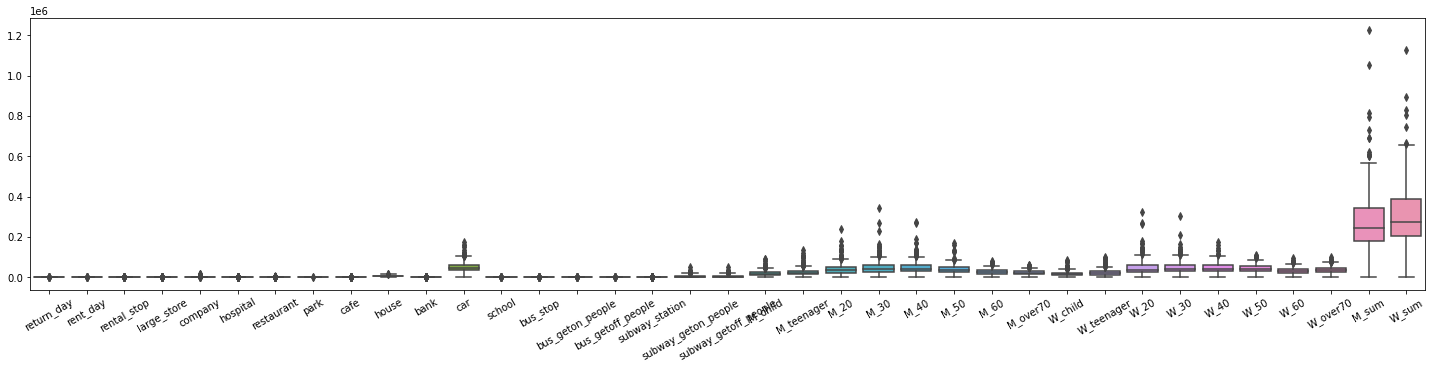

In [12]:
# 모든 feature를 보여주는 boxplot
plt.figure(figsize = (25,5))
sns.boxplot(data = df)
plt.xticks(rotation=30)

연령별 생활인구 feature, 그 중 성별 총 생활인구 feature가 다른 feature들에 비해 훨씬 큰 수치의 data를 갖고있어<br>
scaling의 필요성을 느꼈고 연령별 생활인구 feature를 제외했을때의 feature들 끼리의 boxplot을 더 자세히 보기위해<br>
생활인구 feature를 제외시키고 확인해보겠습니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'return_day'),
  Text(1, 0, 'rent_day'),
  Text(2, 0, 'rental_stop'),
  Text(3, 0, 'large_store'),
  Text(4, 0, 'company'),
  Text(5, 0, 'hospital'),
  Text(6, 0, 'restaurant'),
  Text(7, 0, 'park'),
  Text(8, 0, 'cafe'),
  Text(9, 0, 'house'),
  Text(10, 0, 'bank'),
  Text(11, 0, 'car'),
  Text(12, 0, 'school'),
  Text(13, 0, 'bus_stop'),
  Text(14, 0, 'bus_geton_people'),
  Text(15, 0, 'bus_getoff_people'),
  Text(16, 0, 'subway_station'),
  Text(17, 0, 'subway_geton_people'),
  Text(18, 0, 'subway_getoff_people')])

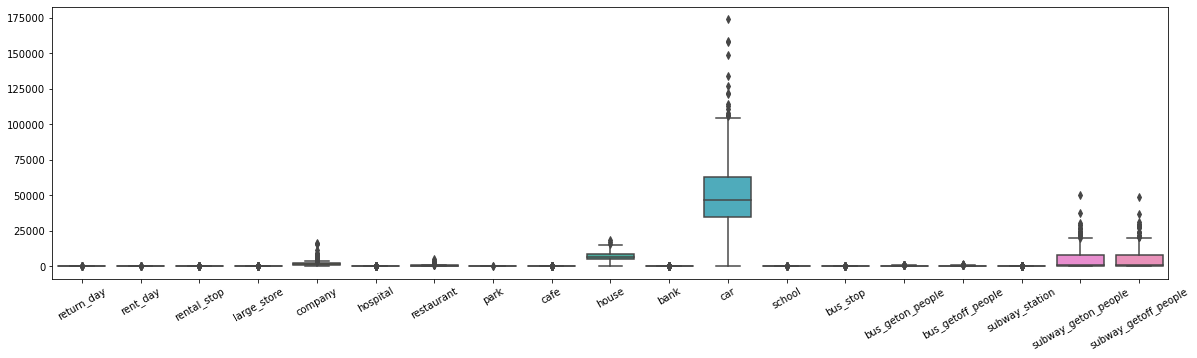

In [13]:
# 연령별 생활인구를 제외한 boxplot을 보기위해 새로운 dataframe 생성
df_napeople = df.iloc[:,0:19]

# 연령대별 생활인구 feature를 제외한 boxplot
plt.figure(figsize = (20,5))
sns.boxplot(data = df_napeople)
plt.xticks(rotation=30)

연령대별 생활인구 feature를 제외하고 boxplot을 확인해본 결과 행정동별 자동차 등록현황인 car feature가 다른 변수들에 비해 data분포가 큰 것으로 보아<br> 연령대별 생활인구 feature를 제외해도 scaling을 진행해야함을 알 수 있습니다.

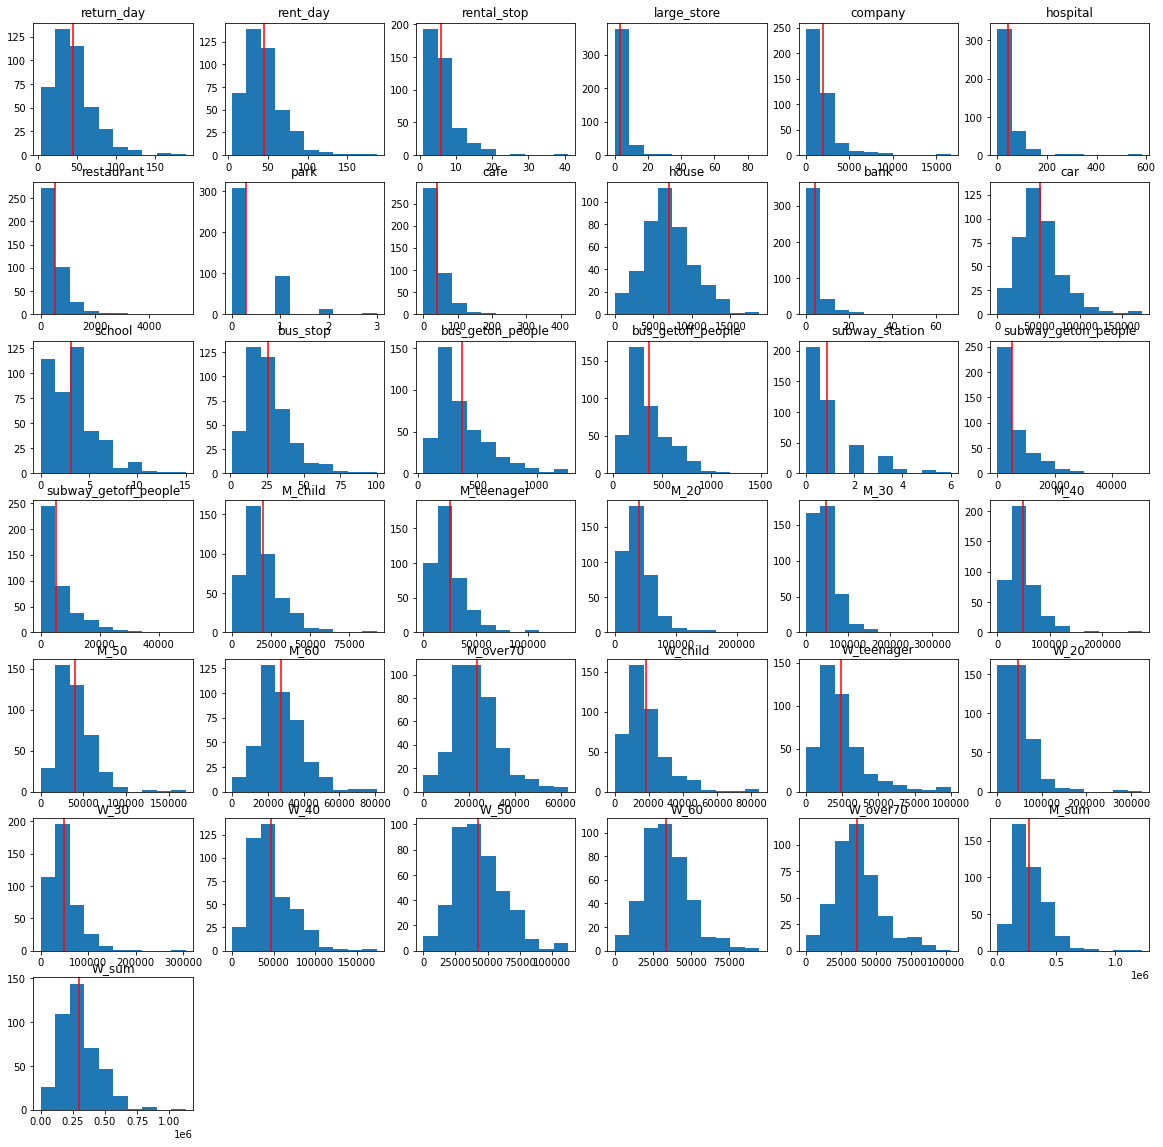

In [14]:
# feature의 분포 확인
plt.figure(figsize=(20,20))
for i in range(1,38):
    plt.subplot(7,6,i)
    plt.hist(df[df.columns[i-1]])
    plt.title('{}'.format(df.columns[i-1]))
    plt.axvline(df[df.columns[i-1]].mean(),color='red')

plt.show()

data들이 대부분 평균에 몰려있는 것을 확인할 수 있습니다.

<AxesSubplot:>

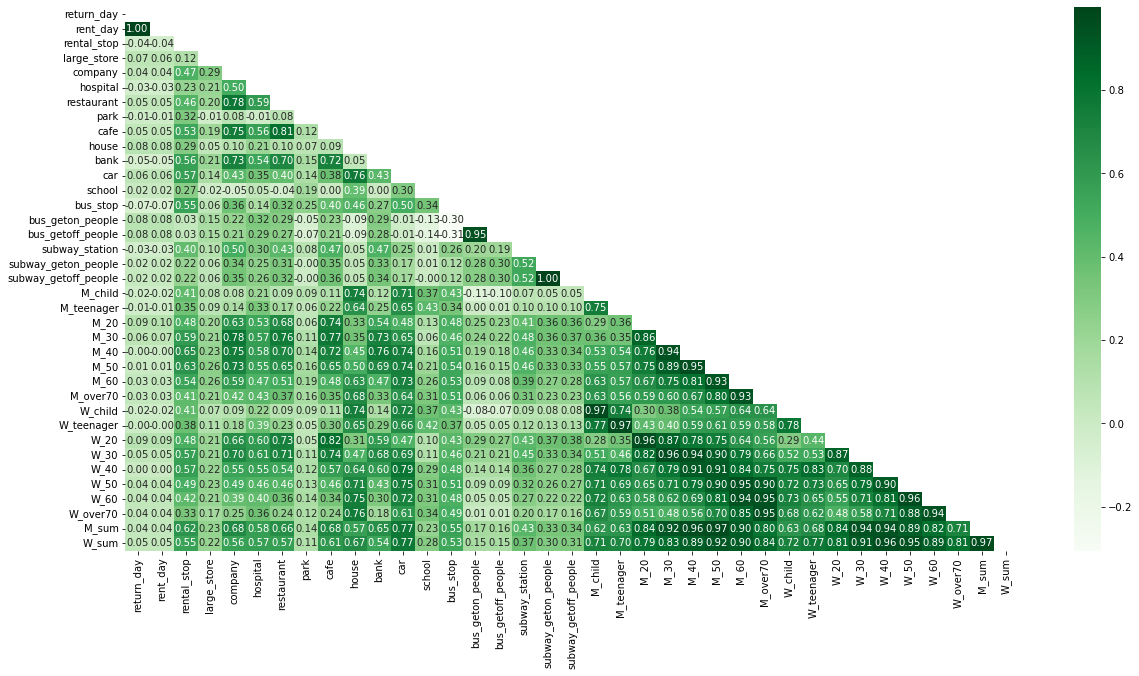

In [15]:
# 상관관계 확인하기
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Greens')

연령대별 생활인구 feature간의 상관계수가 매우 높은 것을 그림을 한눈에 확인할 수 있습니다.<br>
더 자세히 살펴보기위해 따로 dataframe을 만들어 살펴보겠습니다.

<AxesSubplot:>

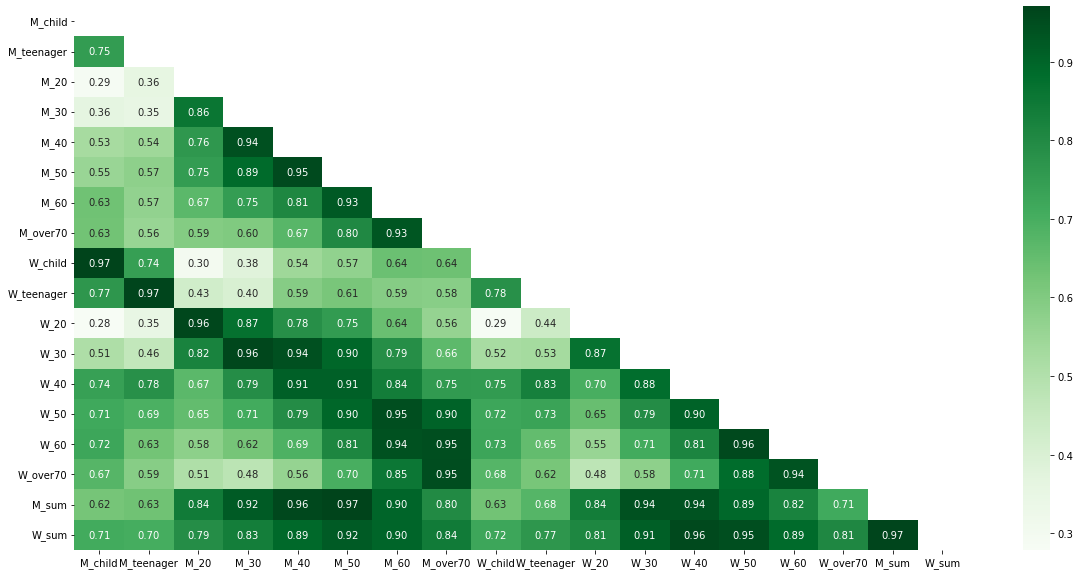

In [16]:
# 연령대별 생활인구 상관관계 파악
age = df.iloc[:,19:]
mask = np.zeros_like(age.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = age.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Greens')

대부분의 <span style='color:red'>상관계수가 0.7 이상으로</span> 상관관계가 매우 높은 것을 확인할 수 있습니다.<br>
회귀분석에서 독립변수들 사이의 상관관계가 높으면, 회귀분석의 전체가정인 독립변수들 간에 상관관계가 높으면 안된다는 조건을 위배하기 때문에<br> 
연령대별 생활인구와 성별 전체 생활인구 feature는 제외시키고 회귀분석을 진행하겠습니다.<br>

<AxesSubplot:>

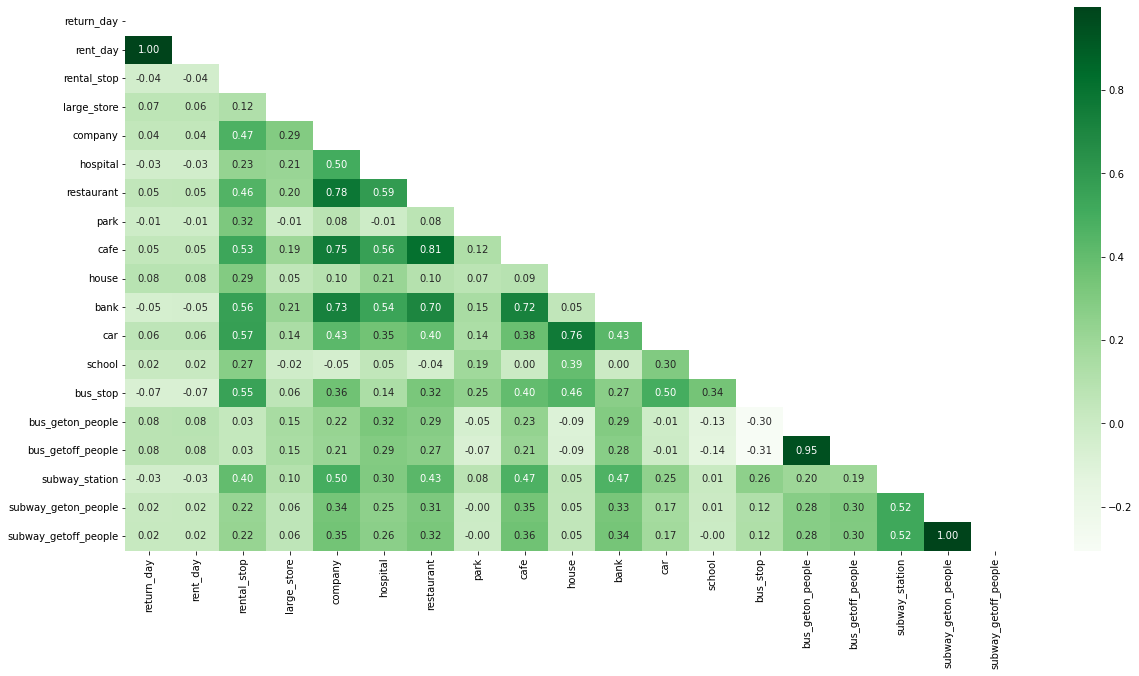

In [17]:
# 나머지 feature만으로 만들어진 상관관계 plot
mask = np.zeros_like(df_napeople.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df_napeople.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Greens')

특이한 점은 대여량과 반납량의 상관관계가 1로 매우 높은 것을 확인할 수 있습니다.

# Best regression 선정

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# 성별_연령대별 생활인구 변수 제외하고 회귀분석을 진행함.
bike_rg = df.iloc[:,0:19]
bike_rg

,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,cafe,house,bank,car,school,bus_stop,bus_geton_people,bus_getoff_people,subway_station,subway_geton_people,subway_getoff_people
0,42.58,42.35,7,2.0,2988.0,5.0,287.0,0.0,13.0,9716.0,8.0,42080.0,3.0,9,481.916667,468.350000,2.0,5893.355000,6220.325
1,47.42,46.97,5,6.0,1901.0,44.0,144.0,1.0,43.0,10424.0,5.0,77543.0,3.0,22,261.466818,226.715000,2.0,5360.420000,5483.065
2,29.90,31.00,6,2.0,3489.0,44.0,1986.0,0.0,68.0,8410.0,9.0,83856.0,4.0,22,358.711364,339.960909,1.0,2918.030000,2832.870
3,27.84,28.74,1,0.0,993.0,8.0,326.0,0.0,10.0,2551.0,0.0,19644.0,1.0,9,637.038889,750.655556,0.0,0.000000,0.000
4,43.42,43.35,19,7.0,16661.0,57.0,2419.0,0.0,183.0,6200.0,26.0,134465.0,0.0,100,280.806500,257.203300,3.0,20195.666667,21089.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,19.81,21.13,2,0.0,418.0,14.0,110.0,1.0,15.0,3463.0,1.0,20437.0,1.0,15,193.742000,203.453333,1.0,5325.900000,4802.420
412,13.26,14.65,2,0.0,928.0,15.0,301.0,0.0,25.0,5363.0,1.0,28299.0,2.0,19,265.446316,246.137895,0.0,0.000000,0.000
413,41.19,41.10,4,0.0,929.0,39.0,455.0,0.0,16.0,4327.0,1.0,25513.0,0.0,13,716.153077,619.405385,1.0,18534.900000,17871.290
414,54.03,53.26,7,0.0,1221.0,28.0,59.0,0.0,24.0,6802.0,2.0,44784.0,6.0,18,527.260556,523.633889,0.0,0.000000,0.000


In [20]:
# 사용할 모델별로 target , data 분류
bike_target_rent=bike_rg[['rent_day']]

bike_data_rent=bike_rg[bike_rg.columns.difference(['Dong_name','code_dong','rent_day','return_day','rental_shop','bus_geton_people','subway_geton_people'])]

In [21]:
# target/data 를 numpy array로 변경
y_rent=np.array(bike_target_rent)
y_rent=np.reshape(y_rent,(416,))

X_rent=np.array(bike_data_rent)

#### Ridge, Lasso 회귀분석 모델은 Gridsearch 와 kfold를 이용하여 bset model을 선정한 후,<br> LinearRegression 모델을 포함한 3개의 예측모델 중 최고 성능을 보이는 모델을 선정하겠습니다.

### Ridge

In [22]:
# Gridsearch + Kfold validation
X_trainval, X_test, y_trainval, y_test = train_test_split(X_rent,y_rent,
                                                          test_size=0.25, random_state=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=2)

scaler = StandardScaler()

best_r2 = -1
for alpha in [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100]:   
    mae_val = []
    r2_val = []
    for train_idx , val_idx in kfold.split(X_trainval,y_trainval):
            
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]
        
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_scaled, y_train)
            
        y_valid_hat = ridge.predict(X_valid_scaled)
            
        mae_val.append(mean_absolute_error(y_valid,y_valid_hat))
        r2_val.append(r2_score(y_valid,y_valid_hat))    
    mean_mae = np.mean(mae_val)
    mean_r2 = np.mean(r2_val)
# r2가 클수록 더 좋은 모델이라 선정       
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model_mae = mean_mae
        best_parameters = {'alpha':alpha}
            
            
print("Best score on validation set: {:.4f}".format(best_model_mae))
print("Best score on validation set: {:.4f}".format(best_r2))
print("Best hyperparameters: {}".format(best_parameters))

Best score on validation set: 17.7860
Best score on validation set: 0.0058
Best hyperparameters: {'alpha': 100}


In [23]:
# scaling
scaler.fit(X_trainval)

X_trainval_scaled=scaler.transform(X_trainval)
X_test_scaled=scaler.transform(X_test)

# best model로 ridge 모델 생성
ridge = Ridge(alpha=100)

ridge.fit(X_trainval_scaled, y_trainval)
y_test_hat=ridge.predict(X_test_scaled)

ridge
print('---test셋에 대한 성능---')
print('MAE : ', mean_absolute_error(y_test, y_test_hat))
print('RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('R_square : ', r2_score(y_test, y_test_hat))

---test셋에 대한 성능---
MAE :  19.967546912192574
RMSE :  25.302030342541137
R_square :  -0.039873801939279474


In [24]:
# Wrapper 사용
from sklearn.feature_selection import RFE

select = RFE(ridge, n_features_to_select=8, step=1)
select.fit(X_trainval_scaled,y_trainval)

X_train_selected = select.transform(X_trainval_scaled)
X_test_selected = select.transform(X_test_scaled)

ridge = Ridge(alpha=100)

ridge.fit(X_train_selected, y_trainval)
y_test_hat=ridge.predict(X_test_selected)

ridge
print('---test셋에 대한 성능---')
print('MAE : ', mean_absolute_error(y_test, y_test_hat))
print('RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('R_square : ', r2_score(y_test, y_test_hat))

---test셋에 대한 성능---
MAE :  19.863502170173977
RMSE :  25.1605917589415
R_square :  -0.02828048778884029


In [25]:
# PCA 사용
from sklearn.decomposition import PCA

pca= PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_trainval_scaled)
X_test_pca = pca.transform(X_test_scaled)

ridge = Ridge(alpha=100)

ridge.fit(X_train_pca, y_trainval)
y_test_hat=ridge.predict(X_test_pca)

print('---test셋에 대한 성능---')
print('MAE : ', mean_absolute_error(y_test, y_test_hat))
print('RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('R_square : ', r2_score(y_test, y_test_hat))

---test셋에 대한 성능---
MAE :  19.85940586426824
RMSE :  25.243281231028874
R_square :  -0.03505041532858577


모델 향상을 위해 여러가지 방법을 사용해보았지만, 의미있는 모델을 생성하기 힘들다고 판단하였습니다..

### Lasso Regression

In [26]:
# Gridsearch + Kfold validation
scaler = StandardScaler()

best_r2 = -1
for alpha in [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100]:   
    mae_val = []
    r2_val = []
    for train_idx , val_idx in kfold.split(X_trainval,y_trainval):
            
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]
        
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)
            
        y_valid_hat = lasso.predict(X_valid_scaled)
            
        mae_val.append(mean_absolute_error(y_valid,y_valid_hat))
        r2_val.append(r2_score(y_valid,y_valid_hat))    
    mean_mae = np.mean(mae_val)
    mean_r2 = np.mean(r2_val)
# r2가 클수록 더 좋은 모델이라 선정       
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model_mae = mean_mae
        best_parameters = {'alpha':alpha}
            
            
print("Best MAE_score on validation set: {:.4f}".format(best_model_mae))
print("Best R2_score on validation set: {:.4f}".format(best_r2))
print("Best hyperparameters: {}".format(best_parameters))

Best MAE_score on validation set: 18.0328
Best R2_score on validation set: -0.0238
Best hyperparameters: {'alpha': 0.1}


In [27]:
# scaling
scaler.fit(X_trainval)

X_trainval_scaled=scaler.transform(X_trainval)
X_test_scaled=scaler.transform(X_test)

# best model로 ridge 모델 생성
lasso = Lasso(alpha=0.1)

lasso.fit(X_trainval_scaled, y_trainval)
y_test_hat=lasso.predict(X_test_scaled)

print('---test셋에 대한 성능---')
print('MAE : ', mean_absolute_error(y_test, y_test_hat))
print('RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('R_square : ', r2_score(y_test, y_test_hat))

---test셋에 대한 성능---
MAE :  20.677527319156937
RMSE :  26.248128278225646
R_square :  -0.11909401267794784


### Linear Regression

In [28]:
# Linear Regression 모델 생성 및 성능 측정
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent,
                                                          test_size=0.25, random_state=1)

scaler= StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
        
y_train_hat = lr.predict(X_train_scaled)
y_test_hat = lr.predict(X_test_scaled)

print('mae_score:',mean_absolute_error(y_train,y_train_hat))
print('r2_score:',r2_score(y_test,y_test_hat))    

mae_score: 16.970598119666064
r2_score: -0.14457684018872952


## 모든 예측모델의 설명계수가 <span style='color:red'>음수(-)</span>값을 나타냄<br>==> 예측모델 만들기 <span style='color:red'>실패</span>.

# Clustering

In [29]:
X=bike.iloc[:,4:39]
Y=bike['rent_day']
print(X)
print(Y)

     rental_stop  large_store  company  hospital  restaurant  park   cafe  \
0              7          2.0   2988.0       5.0       287.0   0.0   13.0   
1              5          6.0   1901.0      44.0       144.0   1.0   43.0   
2              6          2.0   3489.0      44.0      1986.0   0.0   68.0   
3              1          0.0    993.0       8.0       326.0   0.0   10.0   
4             19          7.0  16661.0      57.0      2419.0   0.0  183.0   
..           ...          ...      ...       ...         ...   ...    ...   
411            2          0.0    418.0      14.0       110.0   1.0   15.0   
412            2          0.0    928.0      15.0       301.0   0.0   25.0   
413            4          0.0    929.0      39.0       455.0   0.0   16.0   
414            7          0.0   1221.0      28.0        59.0   0.0   24.0   
415           11          1.0   1557.0      32.0       591.0   0.0   41.0   

       house  bank       car  ...   W_child  W_teenager       W_20       W_

## K-means

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [31]:
# scaling
X_train=X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34')])

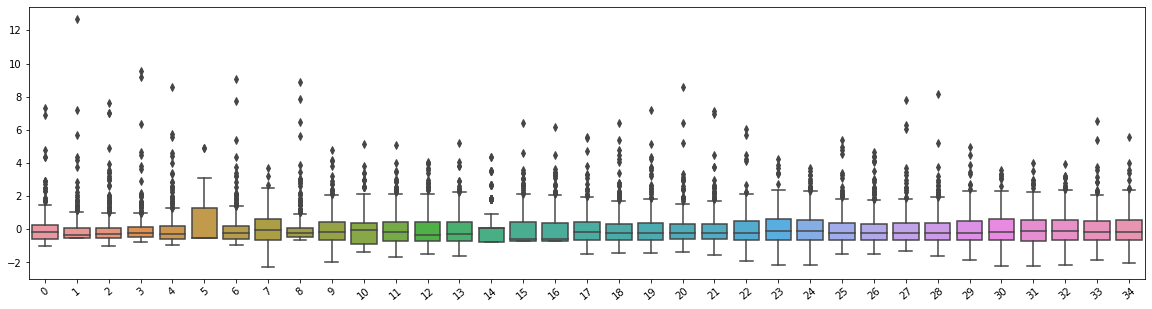

In [32]:
# scaling 후 boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(data = X_train_scaled)
plt.xticks(rotation=40)

In [33]:
sil_scores = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    sil_scores.append(silhouette_score(X_train_scaled, cluster_labels))

Text(0.5, 1.0, 'Silhouette Score')

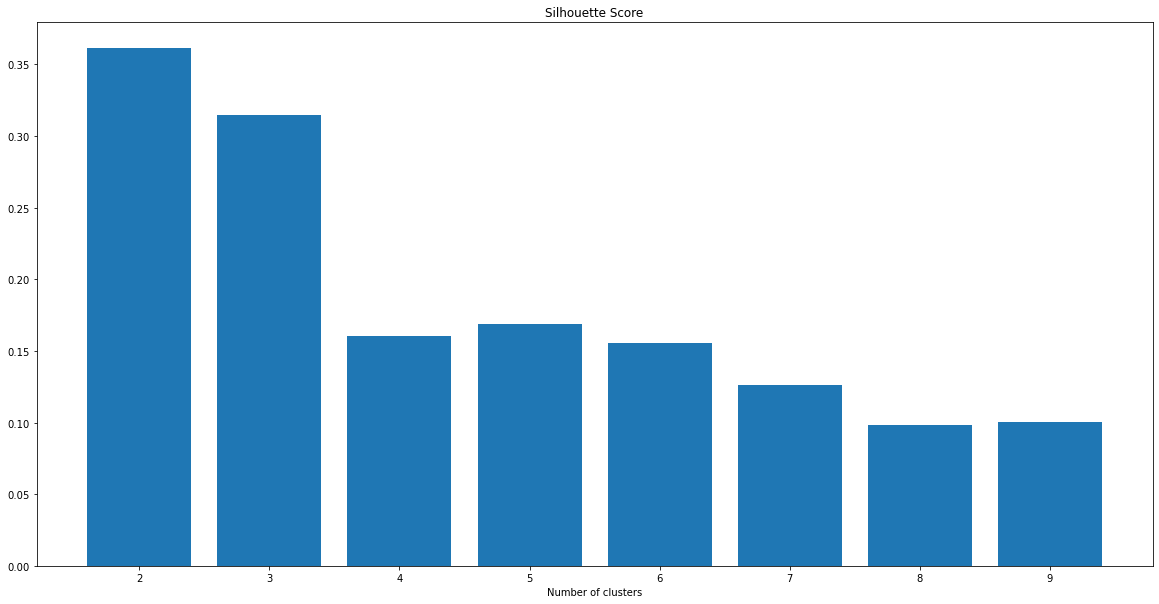

In [34]:
import matplotlib.pyplot as plt

plt.bar(range(2,10), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

In [35]:
#silhouette score 가 가장 높은 2를 선택하여 cluster 분배
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
X_labels=kmeans.labels_
print(X_labels)

[0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1]


In [36]:
bike['cluster']=X_labels
bike.to_csv("k=2_cluster.csv",encoding='euc-kr',index=False)

## Agglomerative clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering

sil_scores = []

for n_clusters in range(2,10): 
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg.fit_predict(X_train_scaled)
    
    sil_scores.append(silhouette_score(X_train_scaled, cluster_labels))

Text(0.5, 1.0, 'Silhouette Score')

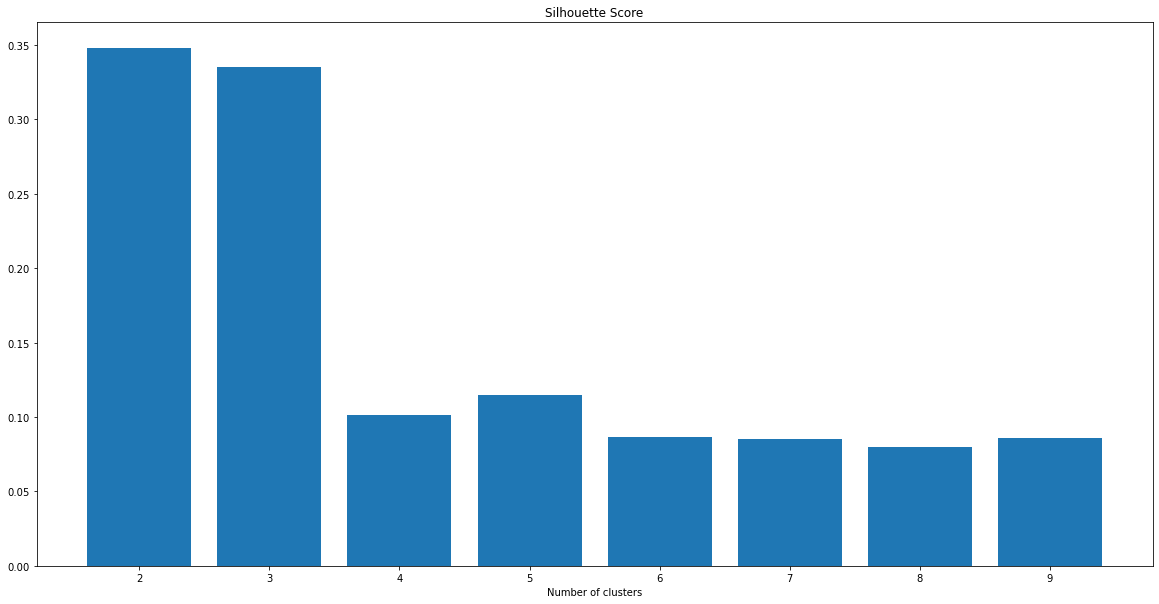

In [38]:
plt.bar(range(2,10), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

silhouette score는 2가 가장 높으나 다양한 cluster 사이의 차이를 알고 싶기 때문에 2와 작은 차이를 보이는 3을 선택하여 cluster를 나눠보겠습니다.

In [39]:
agg=AgglomerativeClustering(n_clusters=3)
agg.fit(X_train_scaled)
X_labels=agg.labels_
print(X_labels)

[1 0 1 0 2 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2
 0 0 0 1 1 2 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 2 2 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 1]


In [40]:
bike['cluster']=X_labels
bike.to_csv("k=3_cluster.csv",encoding='euc-kr',index=False)

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

eps_list=[2,2.1,2.3,2.5,2.7,2.9,3,3.1,3.3,3.5,3.7,3.8,3.9]
min_samples=[3,4,5,6,7]

dbscan_sil_scores =[]

for eps in eps_list:
    dbscan_sil=[]
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        dbscan.fit(X_train_scaled)
        cluster_labels = dbscan.labels_
        dbscan_sil.append(silhouette_score(X_train_scaled,cluster_labels))
    dbscan_sil_scores.append(dbscan_sil)

dbscan_sil_scores=np.stack(dbscan_sil_scores)
dbscan_sil_scores

array([[-0.2146736 , -0.19518552, -0.20574702, -0.21452389, -0.14737392],
       [-0.15416112, -0.17564253, -0.20554714, -0.18109894, -0.18678319],
       [-0.06713147, -0.09502785,  0.1113594 ,  0.10757366,  0.10632116],
       [-0.08983517,  0.16703998,  0.16340369,  0.16340369,  0.16116623],
       [-0.0567225 ,  0.20154179,  0.19381264,  0.18795616,  0.18366771],
       [ 0.01222836,  0.07822617,  0.23708355,  0.2322363 ,  0.2322363 ],
       [ 0.01670012,  0.08447217,  0.26333832,  0.25414981,  0.24964014],
       [ 0.01644899,  0.09216958,  0.27520471,  0.2719849 ,  0.2719849 ],
       [ 0.23753894,  0.32486014,  0.32093241,  0.31466858,  0.31317955],
       [ 0.23614134,  0.25119223,  0.35016214,  0.34690984,  0.34274217],
       [ 0.36438996,  0.36365484,  0.36176644,  0.36346975,  0.36346975],
       [ 0.37182184,  0.37186059,  0.36734362,  0.36461684,  0.36666017],
       [ 0.38295117,  0.38280943,  0.38280943,  0.37729245,  0.37641608]])

In [42]:
max_scores=[]
for i in range(len(eps_list)):
    max_scores.append(dbscan_sil_scores[i].max())
max_index=max_scores.index(max(max_scores))

print('silhouette score의 최대:',max_scores[max_index])
print('silhouette score가 최대일때, eps:',eps_list[max_index])

silhouette score의 최대: 0.3829511660170179
silhouette score가 최대일때, eps: 3.9


In [43]:
dbscan = DBSCAN(eps=3.9)
dbscan.fit(X_train_scaled)

DBSCAN(eps=3.9)

cluster가 나뉘지는 않고 noise만 검출해내기 때문에 저희 주제에 알맞지 않은 방법임을 알 수 있습니다.

In [44]:
X_labels=dbscan.labels_
print(X_labels)

[ 0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0
  0  0  0  0  0  0 -1 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1 -1 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0
  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0
  0  0  0  0  0 -1  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0 -1  0 -1 -1 -1
  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1  0 -1 -1  0  0 -1 -1 -1  0  0 -1  0 -1  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1

In [45]:
bike['cluster']=X_labels
bike.to_csv("./k=1_cluster.csv",encoding='euc-kr',index=False)

## Agglomerative clustering에 따른 cluster feature 의 특징

In [46]:
df= pd.read_csv('k=3_cluster.csv',encoding='euc-kr')
df

,Dong_name,code_dong,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,...,W_teenager,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum,cluster
0,가락1동,11710631,42.58,42.35,7,2.0,2988.0,5.0,287.0,0.0,...,26269.89,37340.87,63199.29,53669.20,56419.00,46770.79,33483.47,321525.67,338615.47,1
1,가락2동,11710632,47.42,46.97,5,6.0,1901.0,44.0,144.0,1.0,...,37623.89,43008.96,53467.95,61379.82,59961.07,47852.46,40968.07,314295.99,371528.51,0
2,가락본동,11710620,29.90,31.00,6,2.0,3489.0,44.0,1986.0,0.0,...,33042.97,67452.62,81496.19,76617.26,78745.07,55112.75,39906.06,449157.07,460679.95,1
3,가리봉동,11530595,27.84,28.74,1,0.0,993.0,8.0,326.0,0.0,...,3141.69,24724.62,23998.43,17637.52,21234.31,14367.82,15249.66,152135.15,121982.20,0
4,가산동,11545510,43.42,43.35,19,7.0,16661.0,57.0,2419.0,0.0,...,16029.77,163080.66,141960.79,92089.70,75059.80,42315.15,28966.70,814951.84,571461.86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,효창동,11170580,19.81,21.13,2,0.0,418.0,14.0,110.0,1.0,...,10713.03,20631.12,24206.48,19457.64,19675.08,14148.53,19063.61,106881.68,138316.20,0
412,후암동,11170510,13.26,14.65,2,0.0,928.0,15.0,301.0,0.0,...,11368.53,25913.49,32108.32,29707.73,24658.22,20501.38,24725.54,162641.75,177066.58,0
413,휘경1동,11230720,41.19,41.10,4,0.0,929.0,39.0,455.0,0.0,...,16476.38,60679.10,27767.30,22969.57,25412.94,20482.21,25691.09,174686.46,208589.71,0
414,휘경2동,11230730,54.03,53.26,7,0.0,1221.0,28.0,59.0,0.0,...,23551.61,52511.26,28566.01,31472.69,33902.75,28311.26,32882.45,218512.85,245257.14,0


Text(0, 0.5, 'Second principal component')

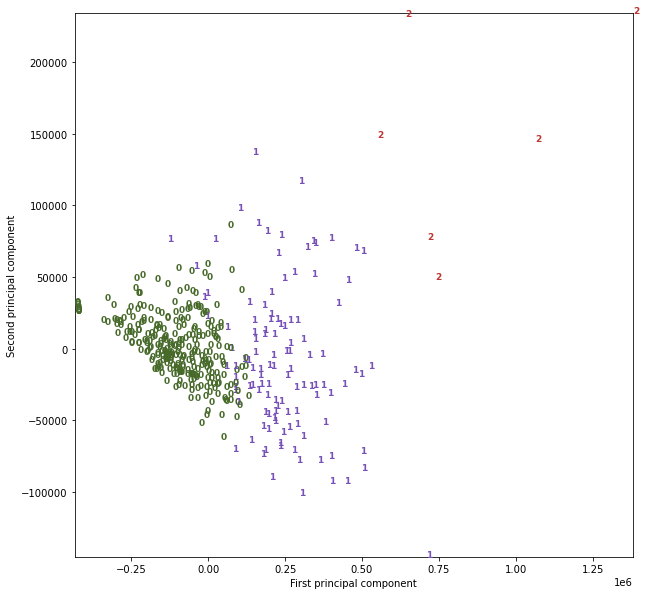

In [47]:
cluster_data = df.iloc[:,4:]
cluster_clu = df.iloc[:,-1:]

cluster_data = np.array(cluster_data)
X_data=cluster_data

cluster_clu = np.array(cluster_clu )
y_clu=np.reshape(cluster_clu,(416,))


from sklearn.decomposition import PCA
colors = ["#476A2A", "#7851B8", "#BD3430"]
pca_clu= PCA(n_components=2)
pca_clu.fit(X_data)

X_data_pca = pca_clu.transform(X_data)

plt.figure(figsize=(10, 10))
plt.xlim(X_data_pca[:, 0].min(), X_data_pca[:, 0].max())
plt.ylim(X_data_pca[:, 1].min(), X_data_pca[:, 1].max())
for i in range(len(X_data_pca)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_data_pca[i, 0], X_data_pca[i, 1], str(y_clu[i]),
             color = colors[y_clu[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

pca를 통해 cluster가 잘 묶였는지 확인해보았습니다. 꽤 잘 묶여있는 모습을 확인할 수 있었습니다.

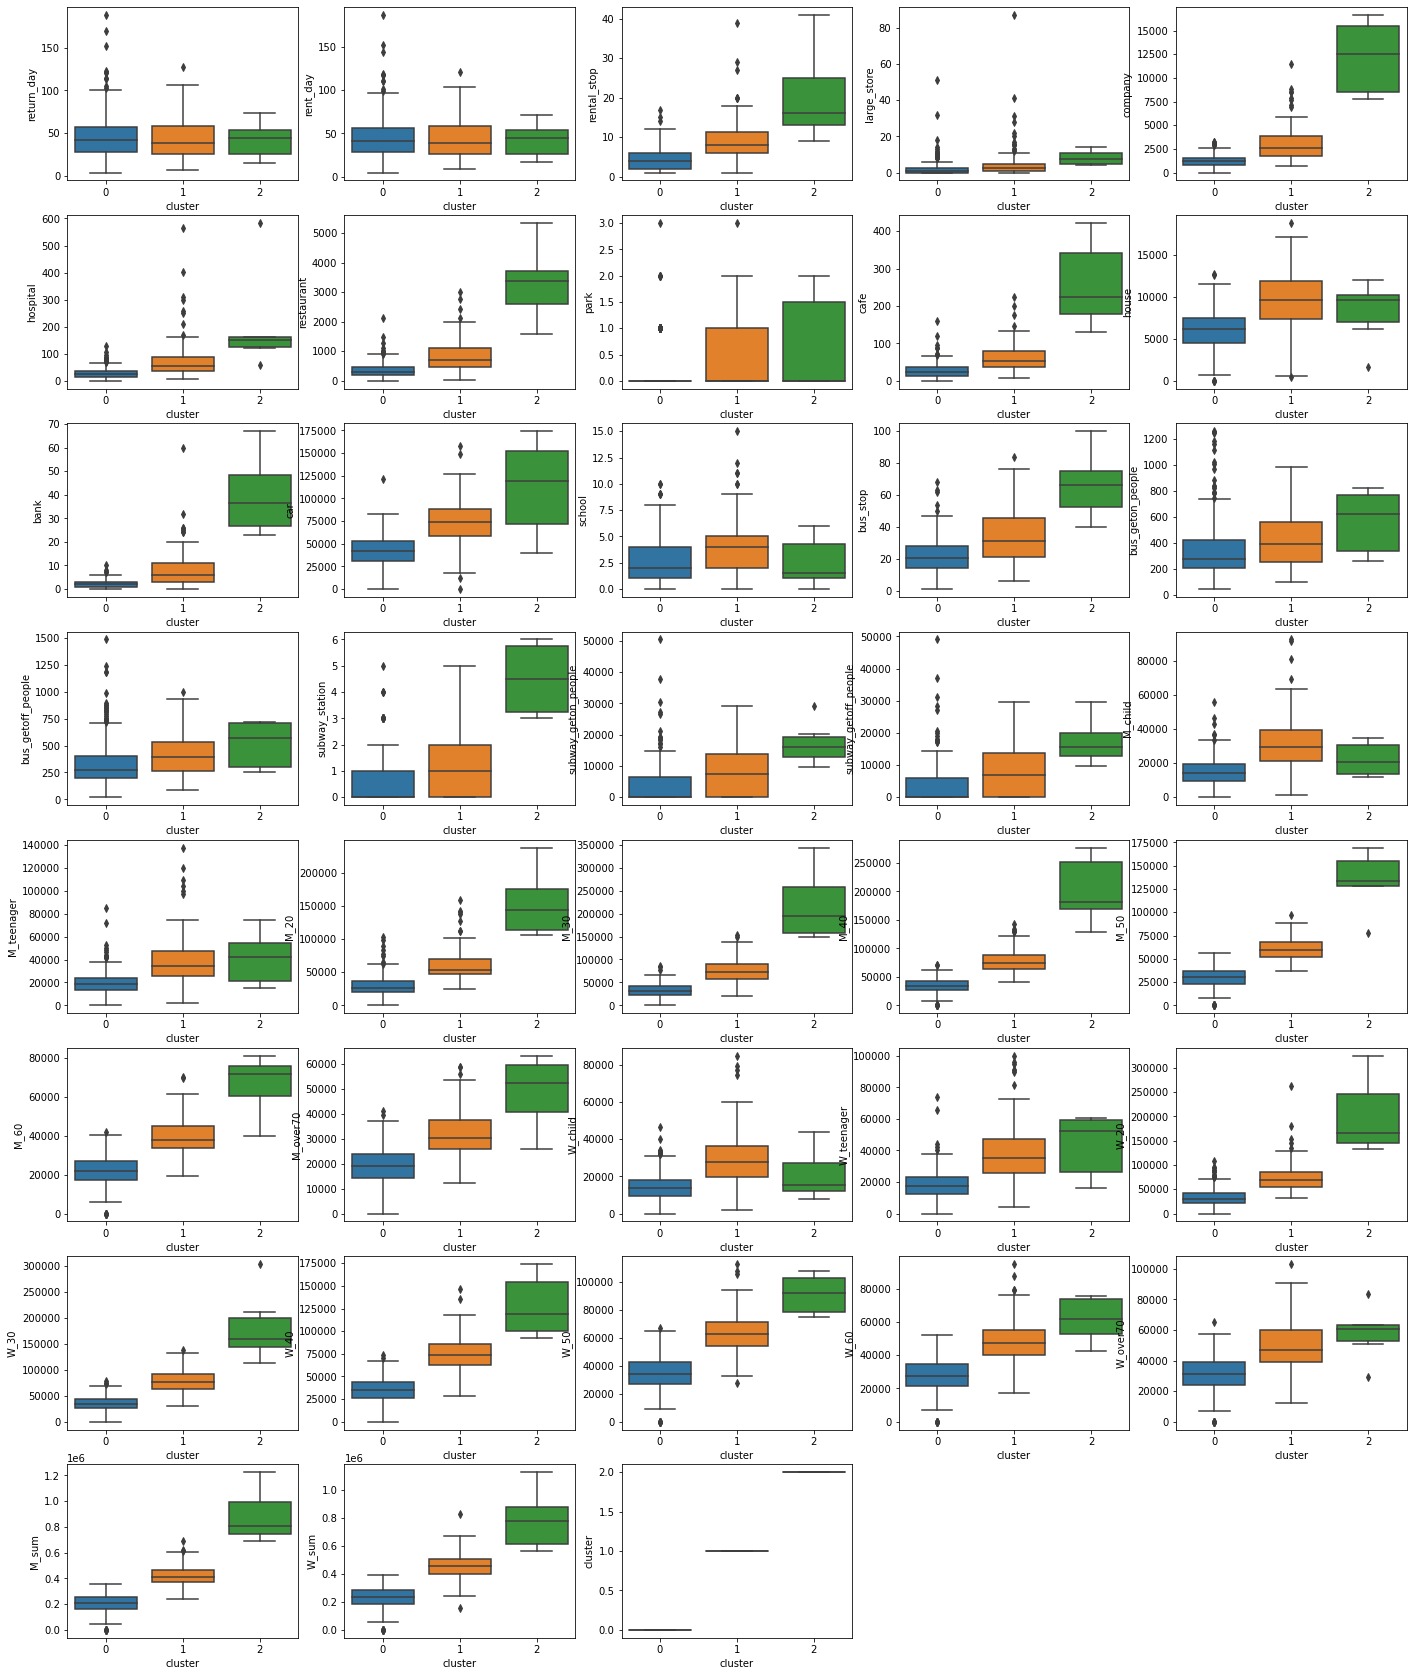

In [48]:
df_all=df.iloc[:,2:]
col=df_all.columns.tolist()

plt.figure(figsize=(24, 30))
for idx,col in enumerate(col):
    plt.subplot(8, 5,idx+1)
    sns.boxplot(x='cluster',y=col,data=df_all)
plt.show()  

clustering을 하였을 때 3개의 cluster들이 각각 다른 feature 특징을 갖고 있음을 확인 할 수 있습니다.<br>
각 cluster의 feature값 분포를 보고 라벨링을 해줬습니다.
 - cluster 0 ==> 전반적인 인프라가 상대적으로 적인 지역
 - cluster 1 ==> 어린이 유동인구가 많고 회사가 많은 지역
 - cluster 2 ==> 전반적인 인프라가 상대적으로 잘 갖춰진 지역<br>
하지만 target 값(rent_day)은 평균과 분포가 비슷함을 확인할 수 있는데 이는 한 대여소당 감당해야 하는 대여량이 비슷함을 암시합니다.<br>
하지만 cluster0에 대해서는 유독 다른 cluster들에 비해 이상치가 많이 존재하는데 <br>이는
이상치에 해당하는 동네는 한 대여소당 감당해야하는 대여량이 많다는 뜻으로 해석할 수 있습니다.<br>
따라서 이러한 이상치에 해당하는 동네의 특징을 확인하고, 대여소 확장을 제안하겠습니다.

## Outlier

In [49]:
groups = df.groupby(df.cluster)
df_0 = groups.get_group(0)
df_1 = groups.get_group(1)
df_2 = groups.get_group(2)
print(df_0)
print(df_1)
print(df_2)

    Dong_name  code_dong  return_day  rent_day  rental_stop  large_store  \
1        가락2동   11710632       47.42     46.97            5          6.0   
3        가리봉동   11530595       27.84     28.74            1          0.0   
6        가양2동   11500604      119.90    117.77            3          0.0   
7        가양3동   11500605       74.45     72.77            4          0.0   
8         가회동   11110600       25.26     26.32            4          0.0   
..        ...        ...         ...       ...          ...          ...   
409       회기동   11230710       68.23     66.81            1         11.0   
411       효창동   11170580       19.81     21.13            2          0.0   
412       후암동   11170510       13.26     14.65            2          0.0   
413      휘경1동   11230720       41.19     41.10            4          0.0   
414      휘경2동   11230730       54.03     53.26            7          0.0   

     company  hospital  restaurant  park  ...  W_teenager      W_20      W_30  \
1     

반납과 대여에 대한 outlier을 spotfire를 이용하여 확인해보니 같은 행정동임을 확인할 수 있었습니다.<br> 이는 '대여소당_하루평균_대여건수'와 '대여소당_하루평균_반납건수'가 상관계수 1로 높은 상관관계를 갖고 있기 때문에 발생한 현상으로 추측됩니다.<br> 따라서 우리는 '전반적인 인프라가 상대적으로 적은 지역'의 대여에 대한 outlier를 파악하여 outlier 값들과 outlier가 아닌 값들에 대한 차이를 분석하고자 합니다.

## group0에 대해 outlier 제외한 feature들의 평균 값 구하기

In [50]:
mask=df_0['Dong_name'].isin(['가양2동','갈현2동','답십리1동','반포본동','보라매동','숭인1동','신림동','응봉동','자양1동','정릉4동'])
df0_noout=df_0[~mask]
df0_noout

,Dong_name,code_dong,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,...,W_teenager,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum,cluster
1,가락2동,11710632,47.42,46.97,5,6.0,1901.0,44.0,144.0,1.0,...,37623.89,43008.96,53467.95,61379.82,59961.07,47852.46,40968.07,314295.99,371528.51,0
3,가리봉동,11530595,27.84,28.74,1,0.0,993.0,8.0,326.0,0.0,...,3141.69,24724.62,23998.43,17637.52,21234.31,14367.82,15249.66,152135.15,121982.20,0
7,가양3동,11500605,74.45,72.77,4,0.0,904.0,14.0,141.0,0.0,...,4933.17,17906.56,31527.40,18676.84,21131.95,18983.14,25125.46,129087.74,142046.15,0
8,가회동,11110600,25.26,26.32,4,0.0,765.0,10.0,323.0,0.0,...,5612.96,10542.17,12441.07,14470.26,11341.39,7262.00,9729.84,79800.26,75183.62,0
9,갈현1동,11380551,20.10,21.42,3,4.0,1498.0,66.0,857.0,1.0,...,23066.15,48865.77,39809.33,42749.64,52605.82,41969.44,48025.16,260313.45,309995.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,회기동,11230710,68.23,66.81,1,11.0,1034.0,21.0,544.0,0.0,...,18347.02,78519.89,30135.69,27846.27,26075.71,21522.12,32082.96,195922.16,243779.99,0
411,효창동,11170580,19.81,21.13,2,0.0,418.0,14.0,110.0,1.0,...,10713.03,20631.12,24206.48,19457.64,19675.08,14148.53,19063.61,106881.68,138316.20,0
412,후암동,11170510,13.26,14.65,2,0.0,928.0,15.0,301.0,0.0,...,11368.53,25913.49,32108.32,29707.73,24658.22,20501.38,24725.54,162641.75,177066.58,0
413,휘경1동,11230720,41.19,41.10,4,0.0,929.0,39.0,455.0,0.0,...,16476.38,60679.10,27767.30,22969.57,25412.94,20482.21,25691.09,174686.46,208589.71,0


In [51]:
mean_list=['return_day','rent_day','rental_stop','large_store','company','hospital','restaurant','park','cafe','house','car','bank',
           'school','bus_stop','bus_geton_people','bus_getoff_people','subway_station','subway_geton_people','subway_getoff_people',
           'M_child','M_teenager','M_20','M_30','M_40','M_50','M_60','M_over70',
           'W_child','W_teenager','W_20','W_30','W_40','W_50','W_60','W_over70','M_sum','W_sum']
mean_df=pd.DataFrame(mean_list,columns=['feature'])
mean_df['outlier_mean']=''

list=[]

for i in range(len(mean_list)):
    mean = df0_noout[mean_list[i]].mean()
    list.append(mean)

outlier 가 아닌 값들의 feature의 평균은 다음과 같습니다.

In [52]:
mean_df['outlier_mean']=list
mean_df

,feature,outlier_mean
0,return_day,42.031092
1,rent_day,42.130599
2,rental_stop,4.316901
3,large_store,2.214789
4,company,1249.510563
5,hospital,28.250000
6,restaurant,358.764085
7,park,0.253521
8,cafe,27.232394
9,house,6100.130282


#### outlier가 아닌 값들에 대한 feature 평균값과 outlier들의 feature 값 비교

In [53]:
df0_outlier = df_0[(df_0['Dong_name']=='가양2동')|(df_0['Dong_name']=='갈현2동')|(df_0['Dong_name']=='정릉4동')
                    |(df_0['Dong_name']=='답십리1동')|(df_0['Dong_name']=='반포본동')|(df_0['Dong_name']=='자양1동')
                    |(df_0['Dong_name']=='보라매동')|(df_0['Dong_name']=='숭인1동')|(df_0['Dong_name']=='신림동')
                    |(df_0['Dong_name']=='응봉동')]
df0_outlier

,Dong_name,code_dong,return_day,rent_day,rental_stop,large_store,company,hospital,restaurant,park,...,W_teenager,W_20,W_30,W_40,W_50,W_60,W_over70,M_sum,W_sum,cluster
6,가양2동,11500604,119.90,117.77,3,0.0,633.0,45.0,154.0,1.0,...,7067.37,23425.53,33401.45,21784.11,30036.86,31056.32,40668.28,163490.75,194331.85,0
10,갈현2동,11380552,169.32,152.23,1,6.0,1579.0,50.0,260.0,0.0,...,31886.59,40459.96,40707.30,49600.38,44770.73,36248.89,46731.31,249117.89,307726.66,0
62,답십리1동,11230600,102.42,99.06,5,6.0,1971.0,40.0,645.0,1.0,...,20932.64,37031.42,53527.12,46436.47,41091.23,32017.15,36580.32,257812.29,291577.91,0
128,반포본동,11650550,114.74,110.19,1,6.0,665.0,18.0,293.0,0.0,...,15325.33,12503.24,10869.11,22029.75,17097.39,11749.64,15889.40,93856.85,110351.95,0
147,보라매동,11620525,188.68,187.26,1,1.0,1367.0,22.0,456.0,1.0,...,14995.96,45416.13,39874.69,33832.83,30052.95,26311.49,33844.34,215540.39,237366.19,0
218,숭인1동,11110700,122.03,117.81,1,0.0,493.0,12.0,335.0,1.0,...,5633.98,14641.90,15672.40,16398.08,18842.67,12774.95,14571.47,93871.76,102879.21,0
237,신림동,11620695,113.29,110.81,6,10.0,1687.0,37.0,780.0,0.0,...,12604.17,107588.28,63592.93,36106.84,32300.73,27059.23,28404.02,332123.67,314140.32,0
305,응봉동,11200580,105.42,101.00,3,0.0,369.0,15.0,72.0,0.0,...,12522.17,13206.38,23124.92,25156.37,20542.13,16352.14,20364.25,120262.62,141353.34,0
321,자양1동,11215820,152.42,143.84,5,0.0,1780.0,54.0,791.0,0.0,...,20614.56,66618.36,53383.07,46194.81,49483.01,36362.16,37264.39,274052.26,321952.43,0
345,정릉4동,11290650,123.23,118.52,1,0.0,929.0,40.0,215.0,1.0,...,19446.20,30676.85,31652.46,37440.37,33060.88,34471.05,40403.90,202734.95,242806.26,0


In [54]:
df0_outlier.to_csv("df0_outlier.csv",encoding='euc-kr',index=False)

<span style='color:blue'>가양2동</span> : 특별히 차이가 나는 feature들은 평균보다 작은 편이나 한강을 끼고 있어 feature의 값들에 비해 대여량이 많은 것으로 추정<br>
<span style='color:blue'>갈현2동</span> : 학교가 많고, 유동인구가 많고, 주거단지가 많은 것으로 보아 주거 및 생활인구의 영향으로 대여량이 많은 것으로 보임<br>
<span style='color:blue'>답십리1동</span> : 많은 feature에서 평균과의 큰 차이를 보여 다양한 feature들의 영향으로 대여량이 많음<br>
<span style='color:blue'>반포본동</span> : 대규모 점포많고 버스 하차인원이 많으며(지하철도 많음) 한강을 끼고 있어 생활인구 대비 방문인구의 수로 인해 대여량이 많은 것으로 추정<br>
<span style='color:blue'>보라매동</span> : 모든 feature가 평균값과 비슷하나 한 대여소에서의 대여량이 많기 때문에 대여소 보충 및 확장을 통해 대여량 분산이 필요할 듯<br>
<span style='color:blue'>숭인1동</span> : 많은 feature에서 평균에 비해 작은 값을 가지나 큰 규모의 공원을 끼고 있어 대여량이 많은 것으로 추정<br>
<span style='color:blue'>신림동</span> : 생활인구, 카페, 음식점, 버스 하차인원이 평균에 비해 높은 값을 가지고 서울대학교를 끼고 있어 대학의 영향이 많은 것으로 추정<br>
<span style='color:blue'>응봉동</span> : 모든 featurer가 평균보다 작은 값이며 버스와 지하철 하차 인원이 적은 곳으로 목적지보다는 중랑천에서 한강으로 이어진 자전거도로가 영향을 미쳤을 것이라 추정<br>
<span style='color:blue'>자양1동</span> : 유동인구, 병원, 음식점수가 많으며 지리적으로 동서울터미널과 건국대가 인접해 있어 자전거로 이동하는 사람이 많을 것으로 추정<br>
<span style='color:blue'>정릉4동</span> : 모든 feature가 평균값과 비슷하나 한 대여소에서의 대여량이 많기 때문에 대여소 보충 및 확장을 통해 대여량 분산이 필요할 듯<br>